<a href="https://colab.research.google.com/github/gsalgadod/Mobile-Prices/blob/main/Proyecto_2_Parte_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Presentación del Problema

En este segundo proyecto se trabajará con un dataset con información sobre celulares. En particular, se cuenta con información sobre los diferentes componentes de un grupo de celulares. Se busca realizar un modelo de Machine Learning que permita clasificar el rango de precio de los diferentes tipos de celulares con base en sus componentes internos y sus especificaciones.

El conjunto de datos se obtiene de Kaggle en el siguiente link: [Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?resource=download)

Para este proyecto se trabajará con dos datasets, uno de estos tiene un rango de precios para cada uno de los celulares y el otro no cuenta con esta columna. La idea principal es utilizar el primer dataset para la creación y ajuste de una serie de modelos de clasificación, posteriormente se elige el modelo final y se utiliza en el segundo dataset para la predicción de los valores.

##Diccionario de datos

##Carga y limpieza de datos

In [1]:
#Librerías
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display='diagram')
from tensorflow.keras.utils import to_categorical
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
tf.config.run_functions_eagerly(True)
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Carga de datos
filename = "/content/drive/MyDrive/Coding Dojo/Data Frames/Mobile Prices Train.csv"
df = pd.read_csv(filename)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Se aprecia que el dataset estudiado presenta 21 columnas con 2000 filas. No se tienen valores nulos.

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Adicionalmente, se observa que todas las columnas son numéricas, lo que quiere decir que el dataset ya ha sido transformado, pero no está escalado, por lo que es un paso necesario en caso de que los modelos a aplicar lo requieran.

In [6]:
df.duplicated().sum()

0

Finalmente, se verifica que el dataset no contiene valores duplicados, por lo que se tiene lo necesario para la realización de los pasos previos a la modelación.

#Visualizaciones

Con el objetivo de tener un mejor entendimiento de los datos, se realizará una serie de visualizaciones de las variables. 

In [7]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Se observa que el dataset está balanceado. 

El primer gráfico que se realizará, es un gráfico de calor con los coeficientes de correlación de las diferentes variables. 

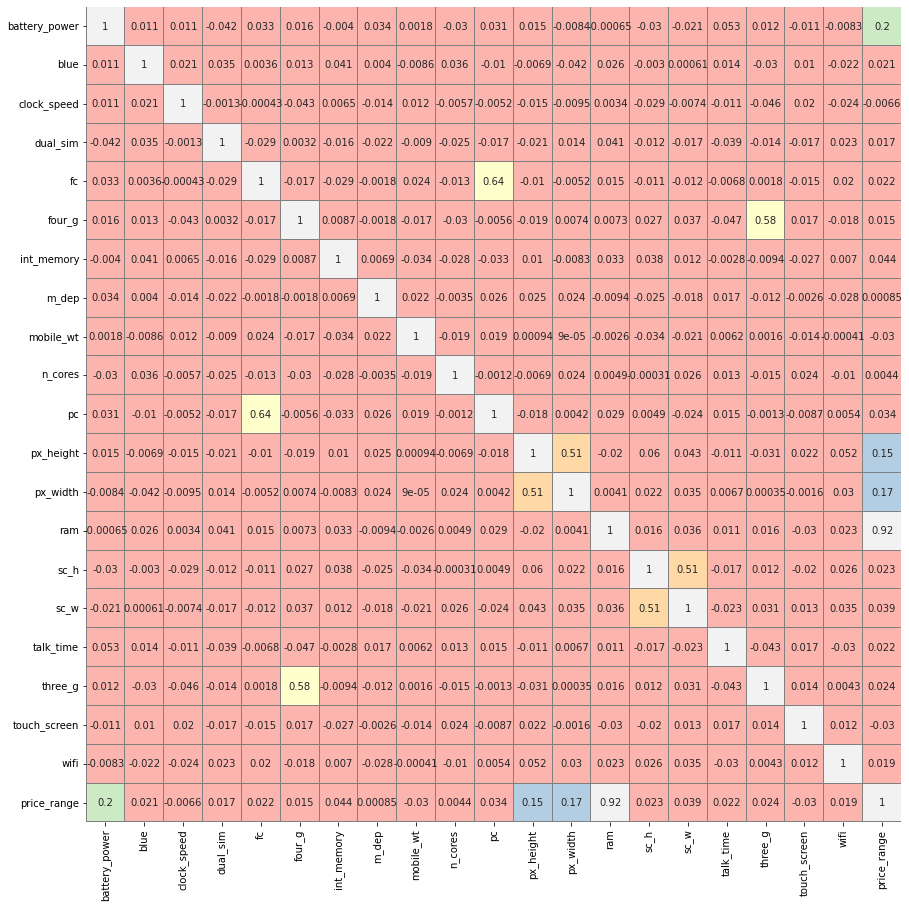

In [8]:
#Primero, se define la correlación entre variables
corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, cmap = "Pastel1", annot = True, cbar = False, linewidths = 0.01,linecolor = "grey", square = True)
plt.show()

Del gráfico anterior, se aprecia que el rango de precio está fuertemente ligado a la ram que cada uno de los celulares tiene. Presentan un coeficiente de 0.92, lo que indica una fuerte correlación. 

Adicionalmente, las otras dos variables que presentan coeficiente de correlación mayor que 0.1 es la altura y el ancho de los celulares. 

Lo anterior, permite suponer que el modelo de clasificación se podría hacer con menos variables que las que se tienen en el dataset completo. 

Considerando las variables que mejor se relacionan con price_range, se crearán tres visualizaciones que permitan entender mejor su comportamiento.

In [9]:
df["px_height"].value_counts()

347    7
179    6
371    6
275    6
674    5
      ..
87     1
648    1
341    1
993    1
483    1
Name: px_height, Length: 1137, dtype: int64

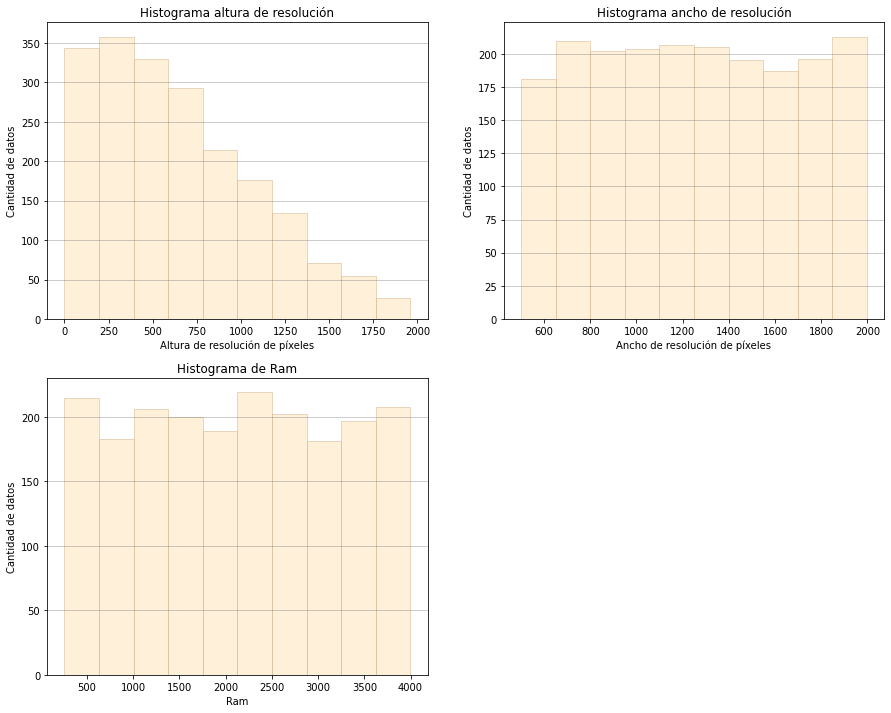

In [10]:
fig1 = plt.figure(figsize=(15,12))
ax1 = fig1.add_subplot(2,2,1)
plt.grid(axis="y", color = "grey", alpha = 0.5)
ax2 = fig1.add_subplot(2,2,2)
plt.grid(axis="y",color = "grey", alpha = 0.5)
ax3 = fig1.add_subplot(2,2,3)
plt.grid(axis="y", color = "grey", alpha = 0.5)


ax1.hist(df["px_height"].values, bins = 10,color= "moccasin", alpha = 0.5, edgecolor = "tan")
ax2.hist(df["px_width"].values, bins = 10, color = "moccasin", alpha = 0.5, edgecolor = "tan")
ax3.hist(df["ram"].values, bins = 10,color= "moccasin", alpha = 0.5, edgecolor = "tan")



ax1.set_xlabel("Altura de resolución de píxeles")
ax1.set_ylabel("Cantidad de datos")
ax1.set_title("Histograma altura de resolución")

ax2.set_xlabel("Ancho de resolución de píxeles")
ax2.set_ylabel("Cantidad de datos")
ax2.set_title("Histograma ancho de resolución")

ax3.set_xlabel("Ram")
ax3.set_ylabel("Cantidad de datos")
ax3.set_title("Histograma de Ram")



plt.show()

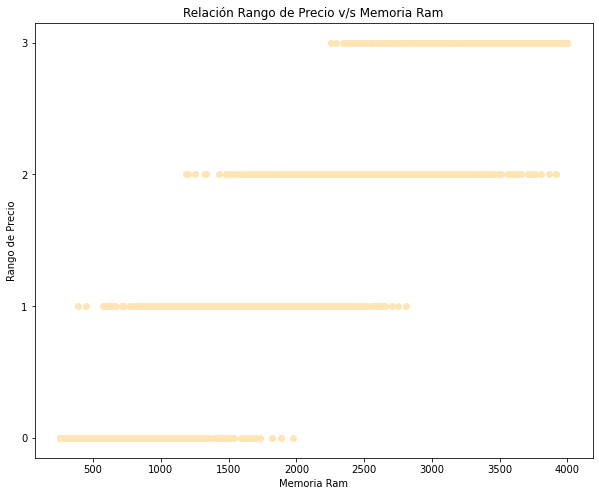

In [11]:
fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.add_subplot(1,1,1)
ax1.scatter(df["ram"].values, df["price_range"], color = "moccasin")

ax1.set_title("Relación Rango de Precio v/s Memoria Ram");
ax1.set_ylabel("Rango de Precio")
ax1.set_xlabel("Memoria Ram")
ax1.set_yticks([0,1,2,3]);

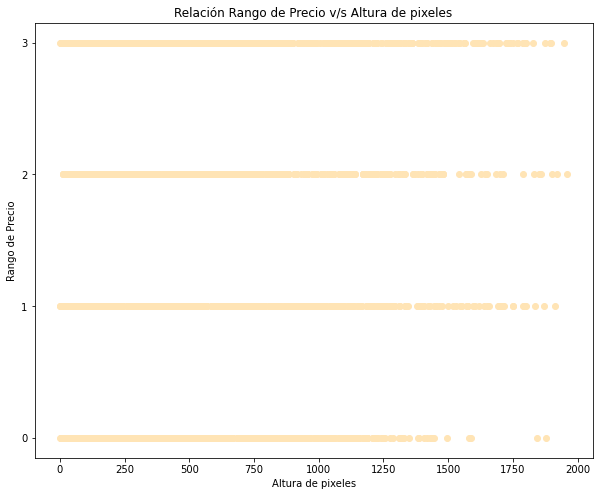

In [12]:
fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.add_subplot(1,1,1)
ax1.scatter(df["px_height"].values, df["price_range"], color = "moccasin")
ax1.set_yticks([0, 1, 2, 3])
ax1.set_title("Relación Rango de Precio v/s Altura de pixeles")
ax1.set_ylabel("Rango de Precio")
ax1.set_xlabel("Altura de pixeles");

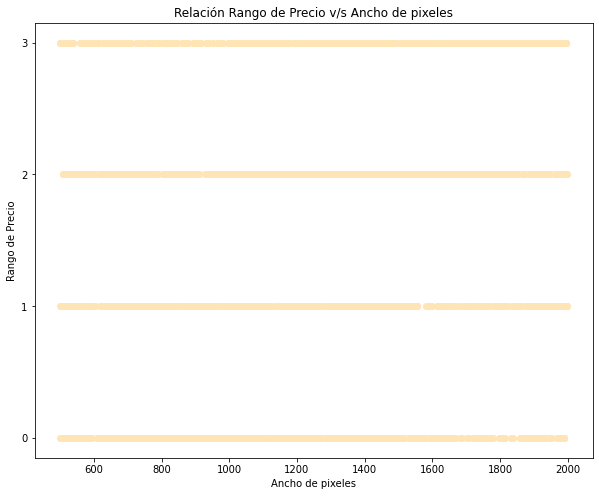

In [13]:
fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.add_subplot(1,1,1)
ax1.scatter(df["px_width"].values, df["price_range"],  color = "moccasin")
ax1.set_yticks([0, 1, 2, 3])
ax1.set_title("Relación Rango de Precio v/s Ancho de pixeles")
ax1.set_ylabel("Rango de Precio")
ax1.set_xlabel("Ancho de pixeles");

##Preparación de datos para los modelos

El primer paso para la preparación de los modelos será la creación de la matriz de características y el vector objetivo. Posteriormente se escalarán los datos y se crearán los dataframe de testeo y entrenamiento. 

In [14]:
#Matriz de características
X = df.drop(columns="price_range")
#Vector objetivo
y = df["price_range"]

In [15]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
#Instanciación del escalador
scaler = StandardScaler()
#Ajuste del escalador
scaler.fit(X_train)
#Transformación de datos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
y_train.shape

(1500,)

Con los pasos previamente realizados se cuenta con un dataset escalado (para los modelos que lo requieran) y un dataset sin escalar. 

##Creación y ajuste de modelos

Para resolver el problema de clasificación presentado se utilizarán dos modelos: XGBoost y una red neuronal. La decisión de solo utilizar estos dos modelos pasa por la efectividad que estos presentan, que suele permitir obtener mejores resultados que con otros modelos más básicos. 

###Modelo XGBoost

In [18]:
# Instanciación y ajuste del modelo XGBoost
xgb = XGBClassifier()

eval_set = [(X_train, y_train),(X_test, y_test)]

history = xgb.fit(X_train, y_train,
        eval_metric = ["merror", "mlogloss"],
        early_stopping_rounds = 10,
        eval_set = eval_set,
        verbose = True)

[0]	validation_0-merror:0.186	validation_0-mlogloss:1.26955	validation_1-merror:0.236	validation_1-mlogloss:1.27468
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-merror:0.187333	validation_0-mlogloss:1.17244	validation_1-merror:0.242	validation_1-mlogloss:1.18408
[2]	validation_0-merror:0.171333	validation_0-mlogloss:1.08989	validation_1-merror:0.22	validation_1-mlogloss:1.10639
[3]	validation_0-merror:0.172	validation_0-mlogloss:1.01979	validation_1-merror:0.218	validation_1-mlogloss:1.03949
[4]	validation_0-merror:0.171333	validation_0-mlogloss:0.959064	validation_1-merror:0.218	validation_1-mlogloss:0.983636
[5]	validation_0-merror:0.170667	validation_0-mlogloss:0.904501	validation_1-merror:0.22	validation_1-mlogloss:0.933551
[6]	validation_0-merror:0.166667	validation_0-mlogloss:0.856708	validation_1-merror:0.212	validation_1-mlogloss:0.889451
[7

In [19]:
results = xgb.evals_result()
epochs = len(results["validation_0"]["merror"])
x_axis = range(0, epochs)

In [20]:
y_pred = xgb.predict(X_test)
pred_train = xgb.predict(X_train)
print(classification_report(y_train, pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       368
           1       0.98      0.98      0.98       382
           2       0.97      0.98      0.98       380
           3       1.00      0.99      0.99       370

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       132
           1       0.84      0.87      0.85       118
           2       0.87      0.81      0.84       120
           3       0.92      0.94      0.93       130

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



En la tabla anterior se aprecia que se obtiene un accuracy de 0.99 para los datos de entrenamiento y de 0.89 para los datos de testeo.

In [21]:
print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

Training accuracy: 0.986
Testing accuracy: 0.892


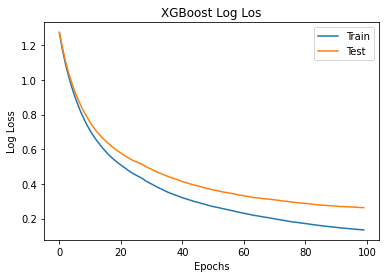

In [22]:
fig, ax = plt.subplots()
ax.plot(x_axis, results["validation_0"]["mlogloss"], label = "Train")
ax.plot(x_axis, results["validation_1"]["mlogloss"], label = "Test")
ax.legend()
plt.ylabel("Log Loss")
plt.xlabel("Epochs")
plt.title("XGBoost Log Los")
plt.show();

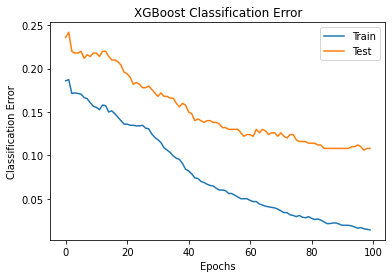

In [23]:
fig, ax = plt.subplots()
ax.plot(x_axis, results["validation_0"]["merror"], label = "Train")
ax.plot(x_axis, results["validation_1"]["merror"], label = "Test")
ax.legend()
plt.ylabel("Classification Error")
plt.xlabel("Epochs")
plt.title("XGBoost Classification Error")
plt.show();

###Ajuste modelo XGBoost con reducción de características (RFECV)

Se probará modioficar el modelo XGBoost con una reducción de características, para evaluar si el rendimiento mejora.

In [24]:
selector = RFECV(estimator = xgb,
                 step = 1,
                 min_features_to_select = 3,
                 cv=5,
                 scoring ="accuracy",
                 verbose = 1)
selector.fit(X_train, y_train)

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features

RFECV(cv=5, estimator=XGBClassifier(objective='multi:softprob'),
      min_features_to_select=3, scoring='accuracy', verbose=1)

In [25]:
print(selector.ranking_)

[ 1 14  6 13  5  8  1  2  1  7 10  1  1  1  3  9 12 11  4 15]


In [26]:
features_names = selector.feature_names_in_

In [27]:
print(features_names)

['battery_power' 'blue' 'clock_speed' 'dual_sim' 'fc' 'four_g'
 'int_memory' 'm_dep' 'mobile_wt' 'n_cores' 'pc' 'px_height' 'px_width'
 'ram' 'sc_h' 'sc_w' 'talk_time' 'three_g' 'touch_screen' 'wifi']


In [28]:
feature_condition = selector.support_

In [29]:
nombres = []
for i in range(0,19):
  if feature_condition[i]== True:
    nombres.append(features_names[i])

In [30]:
nombres

['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']

In [31]:
selector.predict(X_train)

array([1, 2, 3, ..., 2, 3, 1])

In [32]:
X_train_reducido = selector.transform(X_train)
X_train_reducido = pd.DataFrame(X_train_reducido, columns = nombres)
X_train_reducido.head()

,battery_power,int_memory,mobile_wt,px_height,px_width,ram
0,511.0,24.0,136.0,367.0,1264.0,2378.0
1,641.0,7.0,192.0,417.0,759.0,3595.0
2,805.0,34.0,88.0,1262.0,1538.0,3647.0
3,1801.0,52.0,120.0,100.0,1708.0,258.0
4,744.0,33.0,105.0,1252.0,1963.0,2700.0


In [33]:
X_test_reducido = X_test.loc[:,nombres]
X_test_reducido.head()

,battery_power,int_memory,mobile_wt,px_height,px_width,ram
1860,1646,25,200,211,1608,686
353,1182,8,138,275,986,2563
1333,1972,14,196,293,952,1316
905,989,17,166,256,1394,3892
1289,615,58,130,1021,1958,1906


In [36]:
# Instantiate and fit gradient boosting classifier
xgb = XGBClassifier()
xgb.fit(X_train_reducido, y_train)

XGBClassifier(objective='multi:softprob')

In [37]:
print('Training accuracy:', xgb.score(X_train_reducido, y_train))
print('Testing accuracy:', xgb.score(X_test_reducido, y_test))

Training accuracy: 0.9833333333333333
Testing accuracy: 0.892


Se aprecia que con el ajuste de los parámetros no se consigue una mejora significativa. Es más, el accuracy en los datos de testeo baja de 0.99 a 0.98

####Gridsearch modelo XGBoost

Finalmente, se utiliza el método de Gridsearch para buscar los mejores parámetros para el modelo XGBoost

In [38]:
#Creación de la grilla para el gridsearch
grid_values = {"n_estimators":[50,100],
               "learning_rate":[0.05, 0.1, 0.2],
               "min_child_weight":[1,5],
               "gamma":[0.5, 1, 2],
               "subsample":[0.6, 0.8],
               "colsample_bytree":[0.6, 0.8],
               "max_depth":[4,5,6]}

In [40]:
gsxgb = GridSearchCV(xgb, param_grid = grid_values, cv=5)

gsxgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(objective='multi:softprob'),
             param_grid={'colsample_bytree': [0.6, 0.8], 'gamma': [0.5, 1, 2],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 5, 6], 'min_child_weight': [1, 5],
                         'n_estimators': [50, 100], 'subsample': [0.6, 0.8]})

In [41]:
print("Mejores parámetros:")
print(gsxgb.best_params_)
print("Mejor score encontrado:")
print(gsxgb.best_score_)

Mejores parámetros:
{'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Mejor score encontrado:
0.9126666666666667


In [42]:
mejoresparametros = gsxgb.best_params_
mejoresparametros

{'colsample_bytree': 0.8,
 'gamma': 0.5,
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.8}

In [43]:
y_pred = gsxgb.predict(X_test)
score_entrenamiento = gsxgb.score(X_train, y_train)
score_testeo = accuracy_score(y_pred, y_test)

In [44]:
print(f"Score de entrenamiento {score_entrenamiento} ")
print(f"Score de testeo {score_testeo} ")



Score de entrenamiento 1.0 
Score de testeo 0.894 


Con el método Gridsearch se logra aumentar el score de entrenamiento a 1, mientras que el score de testeo pasa de 0,89 a 0,894.

###Red Neuronal

Junto con el modelo XGBoost se decide probar un modelo de red neuronal que permita resolver el problema.

In [66]:
#Los vectores objetivos se pasan a tipo categórico, para que el modelo no los considere como números.
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [49]:
input_shape = X_train_scaled.shape[1]
input_shape

20

In [50]:
X_train_scaled.shape

(1500, 20)

####Modelo inicial

In [51]:
#Definición tipo de modelo
modelo = Sequential()

#Capas olcutas
#Primera capa. Se usan 20 neuronas (igual a la cantidad de categorías de los datos), se usa una capa densa (totalmente conectada) y la función de activación relu
modelo.add(Dense(20, 
                  input_dim = input_shape,
                  activation = "relu"))
#Segunda capa. Se usan 20 neuronas , se usa una capa densa (totalmente conectada) y la función de activación relu.
modelo.add(Dense(20, 
                  activation = "relu"))

#Capa de salida
#Por ser un problema de clasificación binario se utiliza una función de activación sigmoide y un solo nodo.
modelo.add(Dense(4,
                  activation = "sigmoid"))

modelo.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [52]:
history = modelo.fit(X_train_scaled, y_train_cat,
                    validation_data = (X_test_scaled, y_test_cat), 
                    epochs=30)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
47/47 [==============================] - 1s 20ms/step - loss: 1.3609 - acc: 0.3220 - val_loss: 1.3135 - val_acc: 0.3780
Epoch 2/30
47/47 [==============================] - 1s 18ms/step - loss: 1.2378 - acc: 0.4440 - val_loss: 1.2100 - val_acc: 0.4420
Epoch 3/30
47/47 [==============================] - 1s 20ms/step - loss: 1.1158 - acc: 0.5140 - val_loss: 1.0860 - val_acc: 0.5020
Epoch 4/30
47/47 [==============================] - 1s 18ms/step - loss: 0.9807 - acc: 0.5920 - val_loss: 0.9528 - val_acc: 0.5560
Epoch 5/30
47/47 [==============================] - 1s 18ms/step - loss: 0.8491 - acc: 0.6653 - val_loss: 0.8340 - val_acc: 0.6320
Epoch 6/30
47/47 [==============================] - 1s 18ms/step - loss: 0.7364 - acc: 0.7313 - val_loss: 0.7338 - val_acc: 0.6720
Epoch 7/30
47/47 [==============================] - 1s 18ms/step - loss: 0.6404 - acc: 0.7780 - val_loss: 0.6524 - val_acc: 0.7320
Epoch 8/30
47/47 [==============================] - 1s 18ms/step - loss: 0.5594 - a

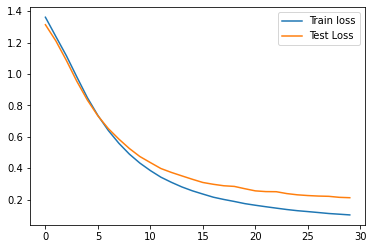

In [53]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

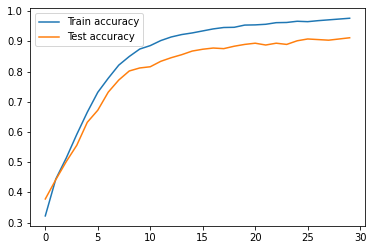

In [54]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();

Se obtiene un accuracy de 0.97 para los datos de entrenamiento y un accuracy de 0.91 para los datos de testeo.

####Modelo modificado

In [55]:
#Definición tipo de modelo
modelo1 = Sequential()

#Capas olcutas
#Primera capa. Se usan 20 neuronas (igual a la cantidad de categorías de los datos), se usa una capa densa (totalmente conectada) y la función de activación relu
modelo1.add(Dense(20, 
                  input_dim = input_shape,
                  activation = "relu"))
modelo1.add(Dropout(.2)) #Se agrega un dropout del 20% para la primera capa oculta


#Segunda capa. Se usan 20 neuronas , se usa una capa densa (totalmente conectada) y la función de activación relu.
modelo1.add(Dense(20, 
                  activation = "relu"))
modelo1.add(Dropout(.2)) #Se agrega un dropout del 20% para la primera capa oculta


#Capa de salida
modelo1.add(Dense(4,
                  activation = "sigmoid"))

modelo1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

early_stopping = EarlyStopping(patience = 3)
history1= modelo1.fit(X_train_scaled, y_train_cat,
                    validation_data = (X_test_scaled, y_test_cat), 
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
47/47 [==============================] - 1s 31ms/step - loss: 1.6739 - acc: 0.2520 - val_loss: 1.4413 - val_acc: 0.2540
Epoch 2/100
47/47 [==============================] - 2s 41ms/step - loss: 1.4345 - acc: 0.2653 - val_loss: 1.3645 - val_acc: 0.2720
Epoch 3/100
47/47 [==============================] - 1s 26ms/step - loss: 1.3744 - acc: 0.2887 - val_loss: 1.3203 - val_acc: 0.3320
Epoch 4/100
47/47 [==============================] - 1s 28ms/step - loss: 1.3151 - acc: 0.3667 - val_loss: 1.2757 - val_acc: 0.3920
Epoch 5/100
47/47 [==============================] - 1s 27ms/step - loss: 1.2736 - acc: 0.3893 - val_loss: 1.2171 - val_acc: 0.4480
Epoch 6/100
47/47 [==============================] - 1s 26ms/step - loss: 1.2040 - acc: 0.4400 - val_loss: 1.1386 - val_acc: 0.5120
Epoch 7/100
47/47 [==============================] - 1s 24ms/step - loss: 1.1268 - acc: 0.4847 - val_loss: 1.0395 - val_acc: 0.5520
Epoch 8/100
47/47 [==============================] - 1s 21ms/step - loss: 1.

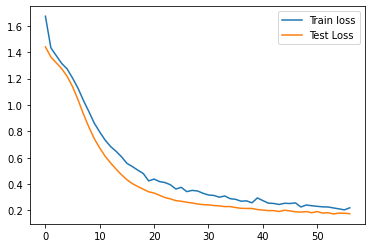

In [56]:
plt.plot(history1.history['loss'], label='Train loss')
plt.plot(history1.history['val_loss'], label='Test Loss')
plt.legend();

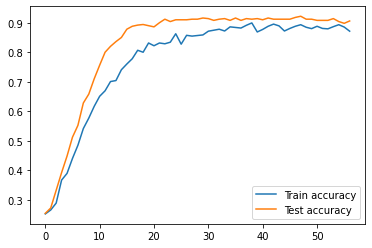

In [57]:
plt.plot(history1.history['acc'], label='Train accuracy')
plt.plot(history1.history['val_acc'], label='Test accuracy')
plt.legend();

Con esta modificación del modelo se baja el accuracy para ambos set de datos.

In [58]:
#Definición tipo de modelo
modelo2 = Sequential()

#Capas olcutas
#Primera capa. Se usan 20 neuronas (igual a la cantidad de categorías de los datos), se usa una capa densa (totalmente conectada) y la función de activación relu
modelo2.add(Dense(20, 
                  input_dim = input_shape,
                  activation = "relu"))
modelo2.add(Dropout(.2)) #Se agrega un dropout del 20% para la primera capa oculta


#Segunda capa. Se usan 20 neuronas , se usa una capa densa (totalmente conectada) y la función de activación relu.
modelo2.add(Dense(20, 
                  activation = "relu"))


#Capa de salida
modelo2.add(Dense(4,
                  activation = "sigmoid"))

modelo2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

early_stopping = EarlyStopping(patience = 3)
history2= modelo2.fit(X_train_scaled, y_train_cat,
                    validation_data = (X_test_scaled, y_test_cat), 
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
47/47 [==============================] - 1s 22ms/step - loss: 1.4381 - acc: 0.3307 - val_loss: 1.3410 - val_acc: 0.3980
Epoch 2/100
47/47 [==============================] - 1s 24ms/step - loss: 1.3017 - acc: 0.3833 - val_loss: 1.2218 - val_acc: 0.4640
Epoch 3/100
47/47 [==============================] - 1s 22ms/step - loss: 1.1954 - acc: 0.4527 - val_loss: 1.0931 - val_acc: 0.5380
Epoch 4/100
47/47 [==============================] - 1s 20ms/step - loss: 1.0854 - acc: 0.5200 - val_loss: 0.9589 - val_acc: 0.6100
Epoch 5/100
47/47 [==============================] - 1s 22ms/step - loss: 0.9641 - acc: 0.5800 - val_loss: 0.8394 - val_acc: 0.6640
Epoch 6/100
47/47 [==============================] - 1s 23ms/step - loss: 0.8467 - acc: 0.6260 - val_loss: 0.7384 - val_acc: 0.7120
Epoch 7/100
47/47 [==============================] - 1s 20ms/step - loss: 0.7598 - acc: 0.6633 - val_loss: 0.6554 - val_acc: 0.7240
Epoch 8/100
47/47 [==============================] - 1s 23ms/step - loss: 0.

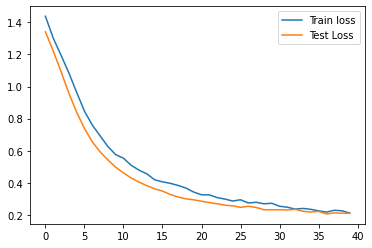

In [59]:
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Test Loss')
plt.legend();

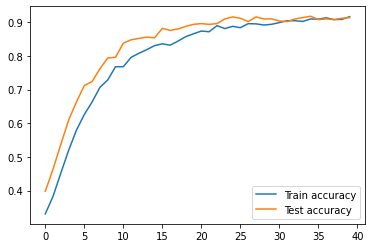

In [60]:
plt.plot(history2.history['acc'], label='Train accuracy')
plt.plot(history2.history['val_acc'], label='Test accuracy')
plt.legend();

Con esta versión del modelo el accuracy de entrenamiento alcanza 0.90 y el de testeo 0.91.

A continuación se crea un dataframe con los resultados de accuracy y pérdida del último modelo evaluado. Posteriormente se busca determinar cuantas épocas permiten tener el accuracy más alto.

In [61]:
dat = pd.DataFrame(history2.history['acc'], columns = ["Accuracy"])
dat['Test accuracy']= history2.history['val_acc']
dat['Train loss']= history2.history['loss']
dat['Test loss']= history2.history['val_loss']

dat

,Accuracy,Test accuracy,Train loss,Test loss
0,0.330667,0.398,1.438069,1.340987
1,0.383333,0.464,1.301673,1.221799
2,0.452667,0.538,1.195438,1.093144
3,0.520000,0.610,1.085352,0.958942
4,0.580000,0.664,0.964052,0.839352
5,0.626000,0.712,0.846719,0.738408
6,0.663333,0.724,0.759842,0.655377
7,0.706667,0.762,0.693078,0.593184
8,0.728667,0.794,0.625982,0.542713
9,0.768000,0.796,0.575409,0.497000


In [62]:
dat.max()

Accuracy         0.916667
Test accuracy    0.918000
Train loss       1.438069
Test loss        1.340987
dtype: float64

In [63]:
dat[dat["Accuracy"]== dat["Accuracy"].max()]

,Accuracy,Test accuracy,Train loss,Test loss
39,0.916667,0.914,0.211043,0.209846


In [64]:
dat[dat["Test accuracy"]== dat["Test accuracy"].max()]

,Accuracy,Test accuracy,Train loss,Test loss
34,0.91,0.918,0.234286,0.217371


Finalmente el máximo test accuracy se obtiene con 34 épocas. Este es el valor que se utilizará para este modelo.

In [65]:
#Definición tipo de modelo
modelo_final = Sequential()

#Capas olcutas
#Primera capa. Se usan 20 neuronas (igual a la cantidad de categorías de los datos), se usa una capa densa (totalmente conectada) y la función de activación relu
modelo_final.add(Dense(20, 
                  input_dim = input_shape,
                  activation = "relu"))
modelo_final.add(Dropout(.2)) #Se agrega un dropout del 20% para la primera capa oculta


#Segunda capa. Se usan 20 neuronas , se usa una capa densa (totalmente conectada) y la función de activación relu.
modelo_final.add(Dense(20, 
                  activation = "relu"))


#Capa de salida
modelo_final.add(Dense(4,
                  activation = "sigmoid"))

modelo_final.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

early_stopping = EarlyStopping(patience = 3)
history_final= modelo_final.fit(X_train_scaled, y_train_cat,
                    validation_data = (X_test_scaled, y_test_cat), 
                    epochs=34,
                    callbacks = [early_stopping])

Epoch 1/34
 4/47 [=>............................] - ETA: 0s - loss: 1.5147 - acc: 0.2734

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


47/47 [==============================] - 1s 23ms/step - loss: 1.4139 - acc: 0.3047 - val_loss: 1.3235 - val_acc: 0.3240
Epoch 2/34
47/47 [==============================] - 1s 19ms/step - loss: 1.2893 - acc: 0.3993 - val_loss: 1.2363 - val_acc: 0.4420
Epoch 3/34
47/47 [==============================] - 1s 19ms/step - loss: 1.2075 - acc: 0.4487 - val_loss: 1.1405 - val_acc: 0.5120
Epoch 4/34
47/47 [==============================] - 1s 19ms/step - loss: 1.0964 - acc: 0.5080 - val_loss: 1.0268 - val_acc: 0.5580
Epoch 5/34
47/47 [==============================] - 1s 20ms/step - loss: 0.9933 - acc: 0.5687 - val_loss: 0.9129 - val_acc: 0.6120
Epoch 6/34
47/47 [==============================] - 1s 19ms/step - loss: 0.9068 - acc: 0.6060 - val_loss: 0.8091 - val_acc: 0.6600
Epoch 7/34
47/47 [==============================] - 1s 26ms/step - loss: 0.8231 - acc: 0.6227 - val_loss: 0.7289 - val_acc: 0.6900
Epoch 8/34
47/47 [==============================] - 1s 23ms/step - loss: 0.7494 - acc: 0.6820 

###Elección de modelo

Considerando todo lo realizado hasta ahora, se decide utilizar el modelo de la red neuronal con 34 épocas para la resolución del problema. Esta decisión se toma ya que se obtienen valores de accuracy para los datos de testeo muy similares que en los otros modelos, pero los valores de accuracy de los datos de entrenamiento son más consistentes. El modelo está menos sobreajustado que los otros probados. 